# Titanic Survival Rate Predictor



The shipwreck of the cruise Titanic was a big disaster and had taken many lives.In this program we attempt to find the relarion of the general information of the passengers and their chances of survival in the shipwreck.By general information we mean,the following:
 * Name
 * PassengerID
 * Sex
 * Age
 * Fare
 * Pclass
 * Parch
 * Sibsp
 and so on.
 

The program is divided into different sections for the convenience of other users and for future reference for myself.The code has been divided into the following subsections:
* Data Acquiring
* Installing Datasets
* Data modification and cleansing
* Analysis of the data
* Visualising the analysis
* Deep analysis
* Prediction and Measurement of Accuracy
* Final Presentation

## Installing Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

For further information on the above functions visit the following website:
* http://pandas.pydata.org
* http://matplotlib.org
* http://scikit-learn.org
* http://numpy.org

The above datasets or libraries have been imported from python.They are in built libraries present in python.In this code they perform the following functions.
* Numpy-Allows us form arrays of data and perform analysis on it
* Pandas-Allows us to create dataframes and do modification in them
* Matplotlib.pyplot-Allows us to create various graphs. 
* Sklearn.neighbors-Allows us to import KneighborsClassifier which helps us to predict the surviavl rate and the accuracy score.
* Sklearn.tree-From thi we import DecisionTreeClassifer which helps us to decide or predict the survival rate in test data frame.
* Sklearn.naive_byes-From this we import MultinomialNB which helps in prediction
* Sklearn.metrics-From this we import accuracy_score to check the accuracy of results between train and test variables.
* Sklearn.linear_model-From this we import LogisticRegression which help in prediction as well a measurement of accuracy.
* Sklearn.naive_byes-allows us to import GaussianNB which helps in prediction.

## Data Acquiring


The data has been downloaded from the official website of Kaggle by clicking on the Datasets tab in Titanic problem.

The data has been divided into two section train data and test data.
All the analysis and initial predictions are done on the train data and then the predictions are used to make a final prediction on test data.

In [2]:
train_data=pd.read_csv('C:\\Users\\USER\\Downloads\\train.csv')
test_data=pd.read_csv('C:\\Users\\USER\\Downloads\\test.csv')

I have used double \\ to avoid the unicode error which would have appeared if I had used \U .

## Data Modification and Cleansing
 
 **Real world data is messy!

The real world data is messy and is in such a format which is both difficult to read and understand.Thus it needs to be cleaned and modified into a legible format.
Thus,
Firstly,we convert the data into a tabular or dataframe form.
Then,we look for empty cells or cells having NaN(not a number)message and delete them.

In [3]:
train_df=pd.DataFrame(train_data)
test_df=pd.DataFrame(test_data)

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Data Cleansing

In [6]:
train_df.dropna()
test_df.dropna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
34,926,1,"Mock, Mr. Philipp Edmund",male,30.0,1,0,13236,57.7500,C78,C
44,936,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S
46,938,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
50,942,1,"Smith, Mr. Lucien Philip",male,24.0,1,0,13695,60.0000,C31,S


## Analysis of the Data

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking the survival rate in trms of individual characteristics.

That is, we will be checking here how the rate of survival depends on the gender,Pclass,,fare and so on.

**By Sex column.

In [8]:
gender_survival=train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)
gender_survival

,Sex,Survived
0,female,0.742038
1,male,0.188908


**By Passenger Class

In [9]:
Pclass_survival=train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)
Pclass_survival

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**By Age

In [10]:
Age_survival=train_df[['Age','Survived']].groupby(['Age'],as_index=False).mean().sort_values(by='Survived',ascending=False)
Age_survival

,Age,Survived
0,0.42,1.000000
9,5.00,1.000000
79,63.00,1.000000
68,53.00,1.000000
1,0.67,1.000000
17,13.00,1.000000
16,12.00,1.000000
87,80.00,1.000000
2,0.75,1.000000
4,0.92,1.000000


**By SibSp

In [11]:
SibSp_survival=train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)
SibSp_survival

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**By Parch

In [12]:
Parch_survival=train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)
Parch_survival

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**By Fare

In [13]:
Fare_survival=train_df[['Fare','Survived']].groupby(['Fare'],as_index=False).mean().sort_values(by='Survived',ascending=False)
Fare_survival

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
83,12.6500,1.0
81,12.4750,1.0
79,12.2875,1.0
194,56.9292,1.0
77,12.0000,1.0


In [14]:
# By the port of embarkation
Embarked_survival=train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)
Embarked_survival

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957






## Visualising the Analysis

Text(0.5, 1.0, 'Survival rate based on gender of passenger')

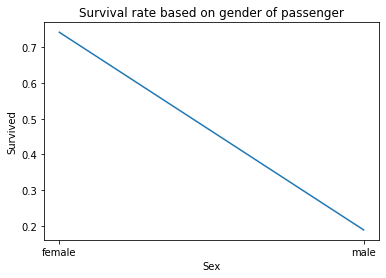

In [15]:
#Plot of survival rate based on gender
plt.plot(gender_survival['Sex'].values,gender_survival['Survived'].values)
plt.ylabel('Survived')
plt.xlabel('Sex')
plt.title('Survival rate based on gender of passenger')

Text(0.5, 1.0, 'Survival rate based on traveling class of passenger')

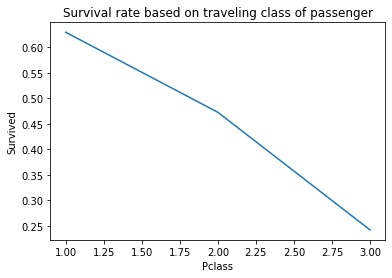

In [16]:
#Plot of survival rate of passengers based on class of travelling
plt.plot(Pclass_survival['Pclass'].values,Pclass_survival['Survived'].values)
plt.ylabel('Survived')
plt.xlabel('Pclass')
plt.title('Survival rate based on traveling class of passenger')

Text(0.5, 1.0, 'Survival rate based on age of passenger')

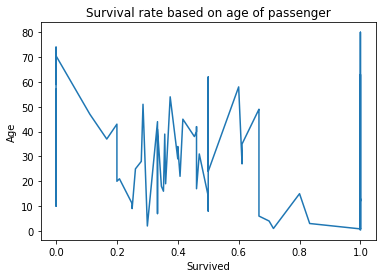

In [17]:
#Plot of survival rate based on age
plt.plot(Age_survival['Survived'].values,Age_survival['Age'].values)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Survival rate based on age of passenger')

The plot above seems quite awkward!
Don't worry we will fix this when we go with deep analysis.
The above plot is such because not all passengers of a particular age survived.We can fix this by using range of ages and using finding mean survival rate for each age group....
Please stick till the end to find out.

Text(0.5, 1.0, 'Survival rate based on fare given by passenger')

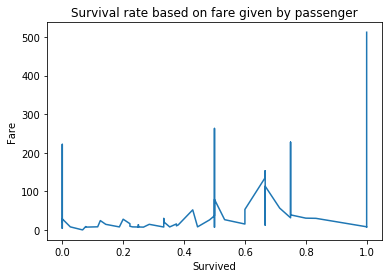

In [18]:
#Plot of survival rate based on fare given by passenger
plt.plot(Fare_survival['Survived'].values,Fare_survival['Fare'].values)
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Survival rate based on fare given by passenger')

This plot here has same problem with the exact same reason and solution

Text(0.5, 1.0, 'Survival rate based on parch of passenger')

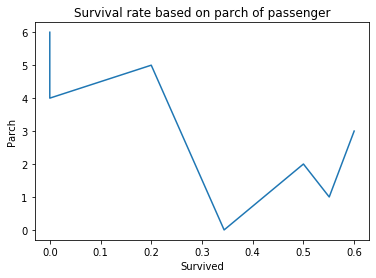

In [19]:
#Plot of survival rate based on parch of passengers
plt.plot(Parch_survival['Survived'].values,Parch_survival['Parch'].values)
plt.xlabel('Survived')
plt.ylabel('Parch')
plt.title('Survival rate based on parch of passenger')

Text(0.5, 1.0, 'Survival rate based on number of siblings and spouses of passenger')

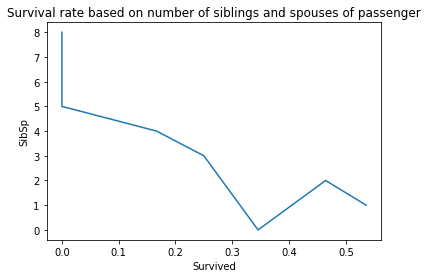

In [20]:
#plot of survival rate based on number of siblings and spouses of passenger
plt.plot(SibSp_survival['Survived'].values,SibSp_survival['SibSp'].values)
plt.xlabel('Survived')
plt.ylabel('SibSp')
plt.title('Survival rate based on number of siblings and spouses of passenger')

Text(0.5, 1.0, 'Survival rate based on the port of embarktion of passenger')

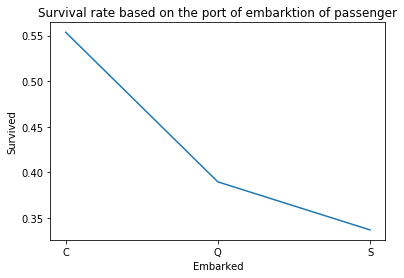

In [21]:
plt.plot(Embarked_survival['Embarked'].values,Embarked_survival['Survived'].values)
plt.ylabel('Survived')
plt.xlabel('Embarked')
plt.title('Survival rate based on the port of embarktion of passenger')

## Deep Analysis
In this section we will go on to analyse the data with a depth.Here, we will also answer the problem we faced during the plotting of graphs of the survival rate of passengers based on their age and the fare paid by the passengers.

In this section we basically look to first group the survival rate based age into different age groups and based on the fare into different range of fare.
Then,we will look to combine the possibilities of survival of different sections....


For example,
As visible from the analysis above, females have better chance of surviva than the males.Also,the people travelling in first class have better survival rate than the labour class.Thus,a lady travelling in first class has better chances of survival than a lady of labour class and much better chances of survival than a male of labour class.
So we will look to find the survival rate of these combined details.

In [22]:
Age_survival['Age']

0      0.42
9      5.00
79    63.00
68    53.00
1      0.67
      ...  
37    28.50
49    36.50
46    34.50
26    20.50
30    23.50
Name: Age, Length: 88, dtype: float64

In [23]:
column=Age_survival.columns
column

Index(['Age', 'Survived'], dtype='object')

In [24]:
Age_survival['Age'].min()

0.42

In [25]:
Age_survival['Age'].max()

80.0

In [26]:
s1=0
s2=0
s3=0
s4=0
s5=0
s6=0
s7=0
s8=0
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
c8=0
#Iterating through the rows to calculate the net survival of each age-group and total number of passenger in each group
for i,row in Age_survival.iterrows():
    if row['Age']>0 and row['Age']<=10:
        s1=s1+row['Survived']
        c1=c1+1
    elif row['Age']>10 and row['Age']<=20:
        s2=s2+row['Survived']
        c2=c2+1
    elif row['Age']>20 and row['Age']<=30:
        s3=s3+row['Survived']
        c3=c3+1
    elif row['Age']>30 and row['Age']<=40:
        s4=s4+row['Survived']
        c4=c4+1
    elif row['Age']>40 and row['Age']<=50:
        s5=s5+row['Survived']
        c5=c5+1
    elif row['Age']>50 and row['Age']<=60:
        s6=s6+row['Survived']
        c6=c6+1
    elif row['Age']>60 and row['Age']<=70:
        s7=s7+row['Survived']
        c7=c7+1
    else:
        s8=s8+row['Survived']
        c8=+1
#Calculating the mean survival rate of each age-group
S1=s1/c1
S2=s2/c2
S3=s3/c3
S4=s4/c4
S5=s5/c5
S6=s6/c6
S7=s7/c7
S8=s8/c8

#Creating a new dataframe of survival rate of passengers based on the Age-Group
ag_survival=[['0-10',S1],['10-20',S2],['20-30',S3],['30-40',S4],['40-50',S5],['50-60',S6],['60-70',S7],['70-80',S8]]
AG_survival=pd.DataFrame(ag_survival,columns=['Age-Group','Mean Survival Rate'])
AG_survival

,Age-Group,Mean Survival Rate
0,0-10,0.686508
1,10-20,0.479148
2,20-30,0.266742
3,30-40,0.344399
4,40-50,0.307443
5,50-60,0.387338
6,60-70,0.214286
7,70-80,1.000000


Text(0.5, 1.0, 'Mean Survival rate based on age-group in which the passenger lies')

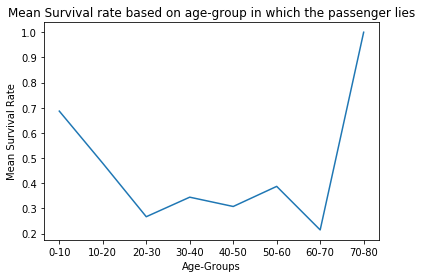

In [27]:
#plot of mean survival rate based on age group of passenger
plt.plot(AG_survival['Age-Group'].values,AG_survival['Mean Survival Rate'])
plt.xlabel('Age-Groups')
plt.ylabel('Mean Survival Rate')
plt.title('Mean Survival rate based on age-group in which the passenger lies')

In [28]:
Fare_survival['Fare'].min()

0.0

In [29]:
Fare_survival['Fare'].max()

512.3292

In [30]:
s1=0
s2=0
s3=0
s4=0
s5=0
s6=0
s7=0
s8=0
s9=0
s10=0
s11=0
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
c8=0
c9=0
c10=0
c11=0
#Iterating through the rows to calculate the net survival of each Fare-Range and total number of passenger in each range
for i,row in Fare_survival.iterrows():
    if row['Fare']>0.0 and row['Fare']<=50.0:
        s1=s1+row['Survived']
        c1=c1+1
    elif row['Fare']>50.0 and row['Fare']<=100.0:
        s2=s2+row['Survived']
        c2=c2+1
    elif row['Fare']>100.0 and row['Fare']<=150.0:
        s3=s3+row['Survived']
        c3=c3+1
    elif row['Fare']>150.0 and row['Fare']<=200.0:
        s4=s4+row['Survived']
        c4=c4+1
    elif row['Fare']>200.0 and row['Fare']<=250.0:
        s5=s5+row['Survived']
        c5=c5+1
    elif row['Fare']>250.0 and row['Fare']<=300.0:
        s6=s6+row['Survived']
        c6=c6+1
    elif row['Fare']>300.0 and row['Fare']<=350.0:
        s7=s7+row['Survived']
        c7=c7+1
    elif row['Fare']>350.0 and row['Fare']<=400.0:
        s8=s8+row['Survived']
        c8=+1
    elif row['Fare']>400.0 and row['Fare']<=450.0:
        s9=s9+row['Survived']
        c9=c9+1
    elif row['Fare']>450.0 and row['Fare']<=500.0:
        s10=s10+1
        c10=c10+1
    else:
        s11=s11+1
        c11=c11+1
    
#Calculating the mean survival rate of each age-group
S1=s1/c1
S2=s2/c2
S3=s3/c3
S4=s4/c4
S5=s5/c5
S6=s6/c6




S11=s11/c11

S7=0
S8=0
S9=0
S10=0

#Creating a new dataframe of survival rate of passengers based on the Age-Group
fare_survival=[['0-50.0',S1],['50.0-100.0',S2],['100.0-150.0',S3],['150.0-200.0',S4],['200.0-250.0',S5],['250.0-300.0',S6],['300.0-350.0',S7],['350.0-400.0',S8],['400.0-450.0',S9],['450.0-500.0',S10],['500.0-550.0',S11]]
Fare_survival=pd.DataFrame(fare_survival,columns=['Fare-range','Mean Survival Rate'])
Fare_survival

,Fare-range,Mean Survival Rate
0,0-50.0,0.349408
1,50.0-100.0,0.708171
2,100.0-150.0,0.787037
3,150.0-200.0,0.722222
4,200.0-250.0,0.450000
5,250.0-300.0,0.750000
6,300.0-350.0,0.000000
7,350.0-400.0,0.000000
8,400.0-450.0,0.000000
9,450.0-500.0,0.000000


In the above section I have considered S7 to be zero because there are no passengers in that range of fare.Thus no passenger on board had paid ticket fare in that range so both s7 andZ c7 are zero.Hence,it throws an error of ZerodividedbyZero.
And in a similar for S8,S9 and S10.

Text(0.5, 1.0, 'Mean Survival rate based on Fare-range in which the passenger lies')

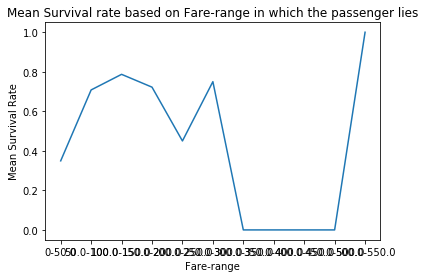

In [31]:
#plot of mean survival rate based on Fare-range of passenger
plt.plot(Fare_survival['Fare-range'].values,Fare_survival['Mean Survival Rate'])
plt.xlabel('Fare-range')
plt.ylabel('Mean Survival Rate')
plt.title('Mean Survival rate based on Fare-range in which the passenger lies')

Now we will combine two different characteristics and information of the passengers.

First of all we combine the characteristic of gender with age group.

It is quite clear from our above analysis that passengers of particular age groups have better survival rate than the others and the female have better survival rate than the male.So,now let us see how the survival rate varies for females of particular age groups and males of a particular age groups.

In [32]:
#Initialising separate variables for calculating the mean survival rate of females of a particular age group from the train_df dataframe

sf1=0
sf2=0
sf3=0
sf4=0
sf5=0
sf6=0
sf7=0
sf8=0
cf1=0
cf2=0
cf3=0
cf4=0
cf5=0
cf6=0
cf7=0
cf8=0

#Initialising separate variables for calculating the mean survival rate of females of a particular age group from the train_df dataframe

sm1=0
sm2=0
sm3=0
sm4=0
sm5=0
sm6=0
sm7=0
sm8=0
cm1=0
cm2=0
cm3=0
cm4=0
cm5=0
cm6=0
cm7=0
cm8=0

#Iterating through the rows

for i,row in train_df.iterrows():
    if row['Age']>0 and row['Age']<=10:
            if row['Sex']=='female':
                sf1=sf1+row['Survived']
                cf1=cf1+1
            if row['Sex']=='male':
                sm1=sm1+row['Survived']
                sm1=sm1+1
    
    if row['Age']>10 and row['Age']<=20:
            if row['Sex']=='female':
                sf2=sf2+row['Survived']
                cf2=cf2+1
            if row['Sex']=='male':
                sm2=sm2+row['Survived']
                sm2=sm2+1
                
    if row['Age']>20 and row['Age']<=30:
            if row['Sex']=='female':
                sf3=sf3+row['Survived']
                cf3=cf3+1
            if row['Sex']=='male':
                sm3=sm3+row['Survived']
                sm3=sm3+1
                
    if row['Age']>30 and row['Age']<=40:
            if row['Sex']=='female':
                sf4=sf4+row['Survived']
                cf4=cf4+1
            if row['Sex']=='male':
                sm4=sm4+row['Survived']
                sm4=sm4+1
                
    if row['Age']>40 and row['Age']<=50:
            if row['Sex']=='female':
                sf5=sf5+row['Survived']
                cf5=cf5+1
            if row['Sex']=='male':
                sm5=sm5+row['Survived']
                sm5=sm5+1
                
    if row['Age']>50 and row['Age']<=60:
            if row['Sex']=='female':
                sf6=sf6+row['Survived']
                cf6=cf6+1
            if row['Sex']=='male':
                sm6=sm6+row['Survived']
                sm6=sm6+1
    if row['Age']>60 and row['Age']<=70:
            if row['Sex']=='female':
                sf7=sf7+row['Survived']
                cf7=cf7+1
            if row['Sex']=='male':
                sm7=sm7+row['Survived']
                sm7=sm7+1
                
    if row['Age']>70 and row['Age']<=80:
            if row['Sex']=='female':
                sf8=sf8+row['Survived']
                cf8=cf8+1
            if row['Sex']=='male':
                sm8=sm8+row['Survived']
                sm8=sm8+1

#Calculating the mean survival rate of females of a particular age group

Sf1=sf1/cf1
Sf2=sf2/cf2
Sf3=sf3/cf3
Sf4=sf4/cf4
Sf5=sf5/cf5
Sf6=sf6/cf6
Sf7=sf7/cf7
Sf8=0#I have assigned this as 0 because in this case both sf8 and cf8 are zero

#Calculating the mean survival rate of males of a particular age group

Sm1=0#I have assigned this as 0 because in this case both sm1 and cm1 are zero
Sm2=0#I have assigned this as 0 because in this case both sm2 and cm2 are zero
Sm3=0#I have assigned this as 0 because in this case both sm3 and cm3 are zero
Sm4=0#I have assigned this as 0 because in this case both sm4 and cm4 are zero
Sm5=0#I have assigned this as 0 because in this case both sm5 and cm5 are zero
Sm6=0#I have assigned this as 0 because in this case both sm6 and cm6 are zero 
Sm7=0#I have assigned this as 0 because in this case both sm7 and cm7 are zero
Sm8=0#I have assigned this as 0 because in this case both sm8 and cm8 are zero

#Creating dataframe of survival rate of male and female passengers based on their age group

ags_survival=[['0-10',Sf1,Sm1],['10-20',Sf2,Sm2],['20-30',Sf3,Sm3],['30-40',Sf4,Sm4],['40-50',Sf5,Sm5],['50-60',Sf6,Sm6],['60-70',Sf7,Sm7],['70-80',Sf8,Sm8]]
AGs_survival=pd.DataFrame(ags_survival,columns=['Age-Group','Mean Survival Rate of Females','Mean Survival Rate of Males'])
AGs_survival

,Age-Group,Mean Survival Rate of Females,Mean Survival Rate of Males
0,0-10,0.612903,0
1,10-20,0.739130,0
2,20-30,0.753086,0
3,30-40,0.836364,0
4,40-50,0.677419,0
5,50-60,0.928571,0
6,60-70,1.000000,0
7,70-80,0.000000,0


In [33]:
#Initialising separate variables for calculating the mean survival rate of females of a particular passenger class from the train_df dataframe

spf1=0
spf2=0
spf3=0
cpf1=0
cpf2=0
cpf3=0


#Initialising separate variables for calculating the mean survival rate of females of a particular passenger class from the train_df dataframe

spm1=0
spm2=0
spm3=0
cpm1=0
cpm2=0
cpm3=0

#Iterating through the rows

for i,row in train_df.iterrows():
    if row['Pclass']==1:

            if row['Sex']=='female':
                spf1=spf1+row['Survived']
                cpf1=cpf1+1
            else:
                spm1=spm1+row['Survived']
                spm1=spm1+1
    
    if row['Pclass']==2:
            if row['Sex']=='female':
                spf2=spf2+row['Survived']
                cpf2=cpf2+1
            else:
                spm2=spm2+row['Survived']
                spm2=spm2+1
                
    if row['Pclass']==3:
            if row['Sex']=='female':
                spf3=spf3+row['Survived']
                cpf3=cpf3+1
            else:
                spm3=spm3+row['Survived']
                spm3=spm3+1
                
#Calculating the mean survival rate of females and males of a particular age group
Spf1=spf1/cpf1
Spf2=spf2/cpf2
Spf3=spf3/cpf3
Spm3=0#I have considered it to be 0 because both spm3 and cpm3 are 0.
Spm2=0#I have considered it to be 0 because both spm2 and cpm2 are 0.
Spm1=0#I have considered it to be 0 because both spm1 and cpm1 are 0.

#Creating a new data frame for the survival rate of male anf female passengers based on the passenger class they travelled in.

spf_survival=[[1,Spf1,Spm1],[2,Spf2,Spm2],[3,Spf3,Spm3]]
SPF_survival=pd.DataFrame(spf_survival,columns=['Passenger class','Mean survival rate of females','Mean survival rate of males'])
SPF_survival

,Passenger class,Mean survival rate of females,Mean survival rate of males
0,1,0.968085,0
1,2,0.921053,0
2,3,0.500000,0


In [34]:
#Initialising separate variables for calculating the mean survival rate of passengers of different age groups travelling in  different passenger class from the train_df dataframe

sp11=0
sp12=0
sp13=0
sp21=0
sp22=0
sp23=0
sp31=0
sp32=0
sp33=0
sp41=0
sp42=0
sp43=0
sp51=0
sp52=0
sp53=0
sp61=0
sp62=0
sp63=0
sp71=0
sp72=0
sp73=0
sp81=0
sp82=0
sp83=0
cp11=0
cp12=0
cp13=0
cp21=0
cp22=0
cp23=0
cp31=0
cp32=0
cp33=0
cp41=0
cp42=0
cp43=0
cp51=0
cp52=0
cp53=0
cp61=0
cp62=0
cp63=0
cp71=0
cp72=0
cp73=0
cp81=0
cp82=0
cp83=0

#Iterating through the rows

for i,row in train_df.iterrows():
    if row['Age']>0 and row['Age']<=10:
            if row['Pclass']==1 :
                sp11=sp11+row['Survived']
                cp11=cp11+1
            if row['Pclass']==2:
                sp12=sp12+row['Survived']
                cp12=cp12+1
            if row['Pclass']==3:
                sp13=sp13+row['Survived']
                cp13=cp13+1
    if row['Age']>10 and row['Age']<=20:
            if row['Pclass']==1 :
                sp21=sp21+row['Survived']
                cp21=cp21+1
            if row['Pclass']==2:
                sp22=sp22+row['Survived']
                cp22=cp22+1
            if row['Pclass']==3:
                sp23=sp23+row['Survived']
                cp23=cp23+1
                
    if row['Age']>20 and row['Age']<=30:
            if row['Pclass']==1 :
                sp31=sp31+row['Survived']
                cp31=cp31+1
            if row['Pclass']==2:
                sp32=sp32+row['Survived']
                cp32=cp32+1
            if row['Pclass']==3:
                sp33=sp33+row['Survived']
                cp33=cp33+1
    if row['Age']>30 and row['Age']<=40:
            if row['Pclass']==1 :
                sp41=sp41+row['Survived']
                cp41=cp41+1
            if row['Pclass']==2:
                sp42=sp42+row['Survived']
                cp42=cp42+1
            if row['Pclass']==3:
                sp43=sp43+row['Survived']
                cp43=cp43+1
                
    if row['Age']>40 and row['Age']<=50:
            if row['Pclass']==1 :
                sp51=sp51+row['Survived']
                cp51=cp51+1
            if row['Pclass']==2:
                sp52=sp52+row['Survived']
                cp52=cp52+1
            if row['Pclass']==3:
                sp13=sp13+row['Survived']
                cp13=cp13+1
    if row['Age']>50 and row['Age']<=60:
            if row['Pclass']==1 :
                sp61=sp61+row['Survived']
                cp61=cp61+1
            if row['Pclass']==2:
                sp62=sp62+row['Survived']
                cp62=cp62+1
            if row['Pclass']==3:
                sp63=sp63+row['Survived']
                cp63=cp63+1
    if row['Age']>60 and row['Age']<=70:
            if row['Pclass']==1 :
                sp71=sp71+row['Survived']
                cp71=cp71+1
            if row['Pclass']==2:
                sp72=sp72+row['Survived']
                cp72=cp72+1
            if row['Pclass']==3:
                sp73=sp73+row['Survived']
                cp73=cp73+1
                
    if row['Age']>70 and row['Age']<=80:
            if row['Pclass']==1 :
                sp81=sp81+row['Survived']
                cp81=cp81+1
            if row['Pclass']==2:
                sp82=sp82+row['Survived']
                cp82=cp82+1
            if row['Pclass']==3:
                sp83=sp83+row['Survived']
                cp83=cp83+1

#Calculating the mean survival rate of passengers of different passenger class of a particular age group
Sp11=sp11/cp11
Sp12=sp12/cp12
Sp13=sp13/cp13
Sp21=sp21/cp21
Sp22=sp22/cp22
Sp23=sp23/cp23
Sp31=sp31/cp31
Sp32=sp32/cp32
Sp33=sp33/cp33
Sp41=sp41/cp41
Sp42=sp42/cp42
Sp43=sp43/cp43
Sp51=sp51/cp51
Sp52=sp52/cp52
Sp53=0#I have assigned this as 0 because in this case both sp53 and cp53 are zero
Sp61=sp61/cp61
Sp62=sp62/cp62
Sp63=sp63/cp63
Sp71=sp71/cp71
Sp72=sp72/cp72
Sp73=sp73/cp73
Sp81=sp81/cp81
Sp82=0#I have assigned this as 0 because in this case both sp82 and cp82 are zero
Sp83=sp83/cp83
#Creating dataframe of survival rate of male and female passengers based on their age group

sp_survival=[['0-10',Sp11,Sp12,Sp13],['10-20',Sp21,Sp22,Sp23],['20-30',Sp31,Sp32,Sp33],['30-40',Sp41,Sp42,Sp43],['40-50',Sp51,Sp52,Sp53],['50-60',Sp61,Sp62,Sp63],['60-70',Sp71,Sp72,Sp73],['70-80',Sp81,Sp82,Sp83]]
SP_survival=pd.DataFrame(sp_survival,columns=['Age-Group','Mean Survival Rate of Pclass1','Mean Survival Rate of Pclass2','Mean Srvival Rate of Pclass3'])
SP_survival

,Age-Group,Mean Survival Rate of Pclass1,Mean Survival Rate of Pclass2,Mean Srvival Rate of Pclass3
0,0-10,0.666667,1.000000,0.283784
1,10-20,0.833333,0.500000,0.253165
2,20-30,0.725000,0.409836,0.232558
3,30-40,0.755102,0.441860,0.206349
4,40-50,0.567568,0.526316,0.000000
5,50-60,0.600000,0.166667,0.000000
6,60-70,0.181818,0.333333,0.333333
7,70-80,0.333333,0.000000,0.000000


In [35]:
#Deleting the rows not required
del train_df['Name']
del train_df['Ticket']
del train_df['Cabin']
del train_df['SibSp']
del test_df['Name']
del test_df['Ticket']
del test_df['Cabin']
del test_df['SibSp']

In [36]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,1,0,3,male,22.0,0,7.2500,S
1,2,1,1,female,38.0,0,71.2833,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,0,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S
5,6,0,3,male,NaN,0,8.4583,Q
6,7,0,1,male,54.0,0,51.8625,S
7,8,0,3,male,2.0,1,21.0750,S
8,9,1,3,female,27.0,2,11.1333,S
9,10,1,2,female,14.0,0,30.0708,C


In [37]:
test_df

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked
0,892,3,male,34.5,0,7.8292,Q
1,893,3,female,47.0,0,7.0000,S
2,894,2,male,62.0,0,9.6875,Q
3,895,3,male,27.0,0,8.6625,S
4,896,3,female,22.0,1,12.2875,S
5,897,3,male,14.0,0,9.2250,S
6,898,3,female,30.0,0,7.6292,Q
7,899,2,male,26.0,1,29.0000,S
8,900,3,female,18.0,0,7.2292,C
9,901,3,male,21.0,0,24.1500,S


In [38]:
train_df=train_df.fillna(method='ffill')
train_df

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,1,0,3,male,22.0,0,7.2500,S
1,2,1,1,female,38.0,0,71.2833,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,0,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S
5,6,0,3,male,35.0,0,8.4583,Q
6,7,0,1,male,54.0,0,51.8625,S
7,8,0,3,male,2.0,1,21.0750,S
8,9,1,3,female,27.0,2,11.1333,S
9,10,1,2,female,14.0,0,30.0708,C


In [39]:
test_df=test_df.fillna(method='ffill')
test_df

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked
0,892,3,male,34.5,0,7.8292,Q
1,893,3,female,47.0,0,7.0000,S
2,894,2,male,62.0,0,9.6875,Q
3,895,3,male,27.0,0,8.6625,S
4,896,3,female,22.0,1,12.2875,S
5,897,3,male,14.0,0,9.2250,S
6,898,3,female,30.0,0,7.6292,Q
7,899,2,male,26.0,1,29.0000,S
8,900,3,female,18.0,0,7.2292,C
9,901,3,male,21.0,0,24.1500,S


In [40]:
#Converting the string notifications or data to digits
train_df=train_df.replace(to_replace=['S','C','Q'],value=[0,1,2])
train_df

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,1,0,3,male,22.0,0,7.2500,0
1,2,1,1,female,38.0,0,71.2833,1
2,3,1,3,female,26.0,0,7.9250,0
3,4,1,1,female,35.0,0,53.1000,0
4,5,0,3,male,35.0,0,8.0500,0
5,6,0,3,male,35.0,0,8.4583,2
6,7,0,1,male,54.0,0,51.8625,0
7,8,0,3,male,2.0,1,21.0750,0
8,9,1,3,female,27.0,2,11.1333,0
9,10,1,2,female,14.0,0,30.0708,1


In [41]:
#Converting the string notifications or data to digits
test_df=test_df.replace(to_replace=['S','C','Q'],value=[0,1,2])
test_df

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked
0,892,3,male,34.5,0,7.8292,2
1,893,3,female,47.0,0,7.0000,0
2,894,2,male,62.0,0,9.6875,2
3,895,3,male,27.0,0,8.6625,0
4,896,3,female,22.0,1,12.2875,0
5,897,3,male,14.0,0,9.2250,0
6,898,3,female,30.0,0,7.6292,2
7,899,2,male,26.0,1,29.0000,0
8,900,3,female,18.0,0,7.2292,1
9,901,3,male,21.0,0,24.1500,0


In [42]:
#Converting the string notifications or data to digits
train_df=train_df.replace(to_replace=['male','female'],value=[0,1])
train_df

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,1,0,3,0,22.0,0,7.2500,0
1,2,1,1,1,38.0,0,71.2833,1
2,3,1,3,1,26.0,0,7.9250,0
3,4,1,1,1,35.0,0,53.1000,0
4,5,0,3,0,35.0,0,8.0500,0
5,6,0,3,0,35.0,0,8.4583,2
6,7,0,1,0,54.0,0,51.8625,0
7,8,0,3,0,2.0,1,21.0750,0
8,9,1,3,1,27.0,2,11.1333,0
9,10,1,2,1,14.0,0,30.0708,1


In [43]:
#Converting the string notifications or data to digits
test_df=test_df.replace(to_replace=['male','female'],value=[0,1])
test_df

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked
0,892,3,0,34.5,0,7.8292,2
1,893,3,1,47.0,0,7.0000,0
2,894,2,0,62.0,0,9.6875,2
3,895,3,0,27.0,0,8.6625,0
4,896,3,1,22.0,1,12.2875,0
5,897,3,0,14.0,0,9.2250,0
6,898,3,1,30.0,0,7.6292,2
7,899,2,0,26.0,1,29.0000,0
8,900,3,1,18.0,0,7.2292,1
9,901,3,0,21.0,0,24.1500,0


In [44]:
necessary_columns=['Pclass','Sex','Parch','Age','Fare','Embarked']
X_train=train_df[necessary_columns]
Y_train=train_df['Survived']
X_test=test_df[necessary_columns]
X_test.head()

,Pclass,Sex,Parch,Age,Fare,Embarked
0,3,0,0,34.5,7.8292,2
1,3,1,0,47.0,7.0000,0
2,2,0,0,62.0,9.6875,2
3,3,0,0,27.0,8.6625,0
4,3,1,1,22.0,12.2875,0


## Prediction and Measurement of Accuracy
In this section we will check the prediction on the test data frame and also measure the accuracy by different functions which include:
* LogisticRegression
* DecisionTreeClassifier
* MultinomialNB
* GaussianNB
* KNearestNeighbour

In [45]:
X_train.shape,Y_train.shape,X_test.shape

((891, 6), (891,), (418, 6))

In [46]:
X_train.head()

,Pclass,Sex,Parch,Age,Fare,Embarked
0,3,0,0,22.0,7.2500,0
1,1,1,0,38.0,71.2833,1
2,3,1,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,0
4,3,0,0,35.0,8.0500,0


In [47]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.46

In [48]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.32

In [49]:
#MultinomialNb
MultiNb=MultinomialNB()
MultiNb.fit(X_train,Y_train)

y_pred=MultiNb.predict(X_test)

acc_multinomial=round(MultiNb.score(X_train,Y_train)*100,2)
acc_multinomial


68.91

In [50]:
#KNearestNeighbor
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)
acc_KNN = round(KNN.score(X_train, Y_train) * 100, 2)
acc_KNN

82.15

In [51]:
# Gaussian Naive Bayes

GaussNb = GaussianNB()
GaussNb.fit(X_train, Y_train)
Y_pred = GaussNb.predict(X_test)
acc_gaussian = round(GaussNb.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.23

## Final Presentation

In [52]:

final_pred=pd.DataFrame({'MODEL':['LogisticRegression',
 'DecisionTreeClassifier','MultinomialNB','GaussianNB','KNearestNeighbour'],'SCORES':[acc_log,acc_decision_tree,
                                                                                      acc_multinomial,acc_KNN,acc_gaussian
                                                                                     ]})
final_pred.sort_values(by='SCORES',ascending=True)

,MODEL,SCORES
2,MultinomialNB,68.91
4,KNearestNeighbour,78.23
0,LogisticRegression,79.46
3,GaussianNB,82.15
1,DecisionTreeClassifier,98.32


## References
This project has been successfully completed with the following the references:
* Titanic Data Science Solutions
* Getting started with Pandas:Kaggle's Titanc Competition